In [17]:
%matplotlib inline
import numpy as np
from scipy import sparse
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
#multi class -> a 아니면 나머지 , b 아니면 나머지  , (이진)
#(NB, KNN, DT, Logistic)

#mulitnomial -> a,b,c, 중 한가지를 선택'
from sklearn.model_selection import train_test_split
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import mglearn

#한글을 출력하기 위한 import
#한글 font를 설정해준다.

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname ="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font',family=font_name)

import matplotlib as mpl # -깨짐 현상을 해결하기 위햏 matplotlib을 import
mpl.rcParams['axes.unicode_minus'] = False # - 깨짐 현상을 해결하기 위한 구문




In [7]:
import os 

#csv 파일을 읽는다.
#파일 이름은 adult.data , names=[feature 이름]
#표의 형태로 데이터를 출력한다.
data = pd.read_csv(
    os.path.join(mglearn.datasets.DATA_PATH, "adult.data"), header=None, index_col=False,
    names = ['age', 'workclass','fnlwgt','education','education-num','marital-status',
            'occupation','relationship','race','gender','capital-gain','capital-loss',
            'hours-per-week','native-country','income'])
data = data[['age','workclass','education','gender','hours-per-week','occupation','income']]
display(data.head())

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


In [8]:
#성별에 따른 각각의 갯수를 출력
# 남자 21790명, 여자 10771명
print(data.gender.value_counts())

 Male      21790
 Female    10771
Name: gender, dtype: int64


In [9]:
#원본 데이터의 feature들을 출력한다.
print("원본 특성:\n",list(data.columns), "\n")

#pandas를 이용해 더미값들을 data_dummies에 저장한다.
data_dummies = pd.get_dummies(data)

#dummies로 변환 후의 feature이름들을 출력한다.
print("get_dummies 후의 특성:\n", list(data_dummies.columns))

원본 특성:
 ['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income'] 

get_dummies 후의 특성:
 ['age', 'hours-per-week', 'workclass_ ?', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th', 'education_ 11th', 'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate', 'education_ HS-grad', 'education_ Masters', 'education_ Preschool', 'education_ Prof-school', 'education_ Some-college', 'gender_ Female', 'gender_ Male', 'occupation_ ?', 'occupation_ Adm-clerical', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct', 'occupation_ 

In [12]:
features = data_dummies.loc[:, 'age':'occupation_ Transport-moving']
X=features.values
y=data_dummies['income_ >50K'].values
print("X.shape: {} y.shape: {}".format(X.shape, y.shape))

X.shape: (32561, 44) y.shape: (32561,)


In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#위에서 구한 X, y 값을 훈련, 테스트 셋으로 나눈다.
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

#로지스틱 회귀 모델을 생성한뒤 훈련데이터를 학습시킨다.
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

#해당 학습모델을 이용해 테스트 점수를 확인한다.
print("테스트 점수: {:.2f}".format(logreg.score(X_test, y_test)))

테스트 점수: 0.81


C:\Users\12zzz\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [14]:
#숫자 특성으로 demo_df를 설정한다.
demo_df=pd.DataFrame({'숫자 특성': [0,1,2,1], 
                     '범주형 특성': ['양말','여우','양말','상자']})
#demo_df값을 표로 보여준다.
display(demo_df)

,숫자 특성,범주형 특성
0,0,양말
1,1,여우
2,2,양말
3,1,상자


score: 0.63
score: 0.86


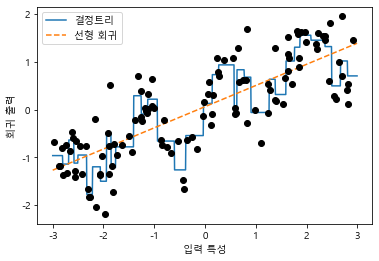

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

#120개의 샘플로 X,y 데이터를 생성한다.
X,y=mglearn.datasets.make_wave(n_samples=120)

#라인을 그리는 문장
line = np.linspace(-3, 3 , 1000, endpoint=False).reshape(-1,1)

#결정트리를 그리는 선 생성
dreg = DecisionTreeRegressor(min_samples_leaf=3).fit(X,y)
plt.plot(line, dreg.predict(line), label = '결정트리')

#선형 회귀를 그리는 선 생성
lreg = LinearRegression().fit(X,y)
plt.plot(line, lreg.predict(line), '--', label = '선형 회귀')

#위에서 얻은 점 120개를 찍는다.
plt.plot(X[:,0], y, 'o', c= 'k')

#x, y 라벨 이름 설정
plt.ylabel('회귀 출력')
plt.xlabel('입력 특성')

#설명칸 위치 설정
plt.legend(loc = 'best')

#선형 회귀 점수 출력
print("score: {:.2f}".format(lreg.score(X,y)))
#결정 트리 점수 출력
print("score: {:.2f}".format(dreg.score(X,y)))

#스코어 차이가 많이나는 것을 확인할 수 있다.

In [19]:
bins = np.linspace(-3,3,11)
print('구간:{}'.format(bins))

구간:[-3.  -2.4 -1.8 -1.2 -0.6  0.   0.6  1.2  1.8  2.4  3. ]


score: 0.72
score: 0.72


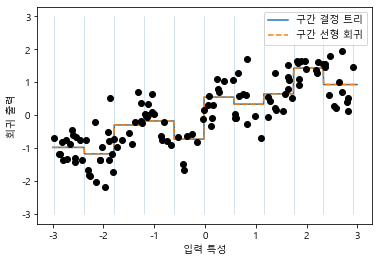

In [25]:
from sklearn.preprocessing import KBinsDiscretizer

#kbinsdiscretizer를 적용한다. 원핫 덴즈 적용
kb = KBinsDiscretizer(n_bins=10, strategy='uniform',encode='onehot-dense')
kb.fit(X)
X_binned = kb.transform(X)

line_binned = kb.transform(line)

#결정트리를 그리는 선 생성
dreg = DecisionTreeRegressor(min_samples_leaf=3).fit(X_binned, y)
plt.plot(line, dreg.predict(line_binned), label = '구간 결정 트리')

#선형 회귀를 그리는 선 생성
lreg = LinearRegression().fit(X_binned,y)
plt.plot(line, lreg.predict(line_binned), '--', label = '구간 선형 회귀')

plt.plot(X[:,0], y, 'o',c='k')
plt.vlines(kb.bin_edges_[0], -3,3, linewidth=1, alpha=.2)
plt.legend(loc='best')
plt.ylabel("회귀 출력")
plt.xlabel("입력 특성")

#선형 회귀 점수 출력
print("score: {:.2f}".format(lreg.score(X_binned,y)))
#결정 트리 점수 출력
print("score: {:.2f}".format(dreg.score(X_binned,y)))

#구간으로 변환하여 원핫인코딩 후 구간별 예측값이 상수값
#스코어 차이는 나지 않음
#결정트리는 특성별로 가장 좋은 구간을 학습하므로 구간 나누기가 별 도움 없음

In [31]:
#다항식 추가

#PolynomialFeatures import 해온다.
# 그 외 여러가지 라이브러리를 import
from sklearn.preprocessing import PolynomialFeatures
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

#boston 데이터를 boston에 저장한다.
#boston 데이터를 훈련, 테스트 셋으로 나누어줌
boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(
boston.data, boston.target, random_state=0)

#데이터 스케일링을 위해 MinMaxScaler를 가져온다.
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#poly객체에 Ploynomial모델을 적용시킨다.
poly = PolynomialFeatures(degree=2).fit(X_train_scaled)

#훈련, 테스트 데이터에 poly 모델을 적용시켜 스케일링한다.
X_train_ploy = poly.transform(X_train_scaled)
X_test_ploy = poly.transform(X_test_scaled)


print("X_train.shape:{}".format(X_train.shape))
print("X_train_poly.shape:{}".format(X_train_ploy.shape))


X_train.shape:(379, 13)
X_train_poly.shape:(379, 105)


In [32]:
print("다항 특성 이름:\n {}".format(poly.get_feature_names()))

다항 특성 이름:
 ['1', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x0 x7', 'x0 x8', 'x0 x9', 'x0 x10', 'x0 x11', 'x0 x12', 'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6', 'x1 x7', 'x1 x8', 'x1 x9', 'x1 x10', 'x1 x11', 'x1 x12', 'x2^2', 'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7', 'x2 x8', 'x2 x9', 'x2 x10', 'x2 x11', 'x2 x12', 'x3^2', 'x3 x4', 'x3 x5', 'x3 x6', 'x3 x7', 'x3 x8', 'x3 x9', 'x3 x10', 'x3 x11', 'x3 x12', 'x4^2', 'x4 x5', 'x4 x6', 'x4 x7', 'x4 x8', 'x4 x9', 'x4 x10', 'x4 x11', 'x4 x12', 'x5^2', 'x5 x6', 'x5 x7', 'x5 x8', 'x5 x9', 'x5 x10', 'x5 x11', 'x5 x12', 'x6^2', 'x6 x7', 'x6 x8', 'x6 x9', 'x6 x10', 'x6 x11', 'x6 x12', 'x7^2', 'x7 x8', 'x7 x9', 'x7 x10', 'x7 x11', 'x7 x12', 'x8^2', 'x8 x9', 'x8 x10', 'x8 x11', 'x8 x12', 'x9^2', 'x9 x10', 'x9 x11', 'x9 x12', 'x10^2', 'x10 x11', 'x10 x12', 'x11^2', 'x11 x12', 'x12^2']


In [37]:
from sklearn.linear_model import Ridge

#상호 작용이 없는 데이터 셋을 rige에 학습시킨다.
ridge = Ridge().fit(X_train_scaled, y_train)
#상호 작용이 없는 모델의 점수를 출력한다.
print("상호작용 특성이 없을 때 점수:{:.3f}".format(ridge.score(X_test_scaled, y_test)))

#상호작용 특성이 있는 데이터셋을 모델에 학습시킨다.
#해당 모델의 점수를 출력한다.
ridge = Ridge().fit(X_train_ploy,y_train)
print("상호작용 특성이 있을 때 점수:{:.3f}".format(ridge.score(X_test_ploy,y_test)))

#상호작용 특성이 있을떄 더 높은 점수를 보이는 것을 확인할 수 있따.
#하지만 모든 데이터에 대해서 이렇게 높은 점수를 보이는 것은 아님

상호작용 특성이 없을 때 점수:0.621
상호작용 특성이 있을 때 점수:0.753
